In [ ]:
# Impoting Necessary Liberary

import tensorflow as tf
import tensorflow
from tensorflow import keras
!pip install transformers
from transformers import TFAutoModel, AutoTokenizer
import pandas as pd
import numpy as np
import os
import json
import sklearn
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
from sklearn import preprocessing  
from sklearn.model_selection import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Downloading the Dataset from kaggle and unzipping it

!pip install -U -q kaggle
!mkdir -p ~/.kaggle
!echo 'set your kaggle username and your unique key to get access to your account' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mrmorj/hate-speech-and-offensive-language-dataset
!unzip '/content/hate-speech-and-offensive-language-dataset.zip'

Archive:  /content/hate-speech-and-offensive-language-dataset.zip
  inflating: labeled_data.csv        


In [ ]:
# Making A DataFrame of out dataset 

curr_dir = os.getcwd()
data = []

# Set the size of Dataset  -- set number according to PC speed more data more training time 

dataset_size = 10000
speech_data = pd.read_csv('/content/labeled_data.csv', nrows=dataset_size)
speech_data.head(5)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
# Making function that Removing starting and end spaces and Removing unnecessary data such as @#$ 

import re

def clean_text(data):
    output = []
    for text in data:
        if text.isdigit() == False:
            text = text.lower()
            text = re.sub(r',', '', text)
            text = re.sub(r'\'', '',  text)
            text = re.sub(r'\"', '', text)
            text = re.sub(r'\(', '', text)
            text = re.sub(r'\)', '', text)
            text = re.sub(r'\n', '', text)
            text = re.sub(r'“', '', text)
            text = re.sub(r'”', '', text)
            text = re.sub(r'’', '', text)
            text = re.sub(r'\.', '', text)
            text = re.sub(r';', '', text)
            text = re.sub(r':', '', text)
            text = re.sub(r'\-', '', text)
            text = re.sub(r'\\', '', text)
            text = re.sub(r'@', '', text)
            text = re.sub(r'#', '', text)
            text = re.sub(r'^', '', text)
            text = re.sub(r'$', '', text)
            text = re.sub(r'&', '', text)
            output.append(text)
    return ''.join(output)

def clean(arr):
    temp = []
    for i in arr:
        text = i.split(':')[-1]
        text = clean_text(text)
        text = text.strip()
        temp.append(text)
    return temp

In [ ]:
# Applying the function and doing DataCleaning 

speech_data['tweet'] = clean(speech_data['tweet'])
speech_data['tweet']

0       as a woman you shouldnt complain about cleanin...
1       boy dats coldtyga dwn bad for cuffin dat hoe i...
2       you ever fuck a bitch and she start to cry? yo...
3                       viva_based she look like a tranny
4       the shit you hear about me might be true or it...
                              ...                        
9995        i aint trying to fuck bitch i just want wings
9996         i aint mad at you bitches thats what hoes do
9997                 i aint mad at you thats what hoes do
9998    i aint never had a prob with no other bitch ov...
9999    i aint no killa but dont push me revenge is th...
Name: tweet, Length: 10000, dtype: object

In [ ]:
# Extracting the unqiue classes their name 

uni_classes = [0,1,2]
class_name = ['neither','offensive_language','hate_speech']
speech_df = pd.DataFrame({
    'class_name' : class_name,
    'class' : uni_classes
})
print(f'unique value of classes is : {uni_classes}')
print(f'Speech type : {class_name}')
total_df = speech_data.groupby(['class'])[['tweet']].count().reset_index()
pd.merge(speech_df, total_df, on="class")

unique value of classes is : [0, 1, 2]
Speech type : ['neither', 'offensive_language', 'hate_speech']


,class_name,class,tweet
0,neither,0,780
1,offensive_language,1,7486
2,hate_speech,2,1734


In [ ]:
# Total Length of DataSet after processing Stage

print(f'Length of dataset is : {len(speech_data)}')

Length of dataset is : 10000


In [ ]:
# Converting the X and y Target data into a list from a Series 

tweet_data = speech_data['tweet'].tolist()
class_data = speech_data['class'].tolist()

In [ ]:
# Splitting the Data into training and Testing Dataset

X_train, X_test, y_train, y_test = train_test_split(tweet_data, speech_data['class'], test_size=0.20)
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

8000
8000
2000
2000


Average length of Data is 63


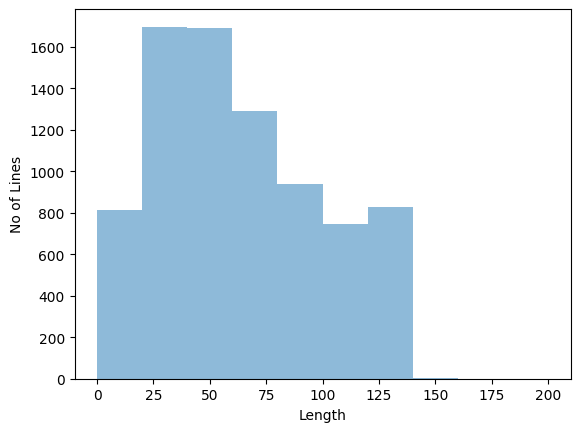

In [ ]:
# Extaracting the total Average Length of Each Sentence and making a BarPlot For Better Visulization

length_data = [len(x) for x in X_train]
avg_length = sum(length_data) // len(length_data)
print(f"Average length of Data is {avg_length}")
plt.hist(length_data, alpha=0.5, label='x', range=[0, 200])
plt.xlabel('Length')
plt.ylabel("No of Lines")
plt.show()

In [ ]:
# Downloading the Pre-Trained Tokenizer from Hugging-Face 

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [ ]:
# Making a function that takes text as Input and Tokenizer it and return it

def regular_encode(texts, tokenizer, maxlen = 70):
    enc_di = tokenizer(texts, pad_to_max_length = True, max_length = maxlen)
    return np.array(enc_di['input_ids'])

In [ ]:
# Inilizaion of MaxLenght of out Input Data and Applying the Function on Sentence and Converting into 

maxlen = 70
Xtrain_encoded = regular_encode(X_train, tokenizer, maxlen = maxlen)
Xtest_encoded = regular_encode(X_test, tokenizer, maxlen = maxlen)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
# Inilizaion of BatchSize and Converting the Dataset into Tensor-slices of specific batch-size 

BATCH_SIZE = 128
AUTO = tf.data.experimental.AUTOTUNE 
train_dataset = tf.data.Dataset.from_tensor_slices((Xtrain_encoded, y_train)).repeat().shuffle(2048).batch(BATCH_SIZE)
test_dataset = tf.data.Dataset.from_tensor_slices((Xtest_encoded, y_test)).batch(BATCH_SIZE)

In [ ]:
# Building our Model it is Pre-Trained BERT model one of the Hugging-Face Model 

def build_model(transformer, loss = 'categorical_crossentropy', max_len = maxlen):
    input_word_ids = tf.keras.layers.Input(shape = (max_len,), dtype = tf.int32, name = "input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]

    #adding dropout layer
    x = tf.keras.layers.Dropout(0.40)(cls_token)

    #using a dense layer of 3 neurons as the number of unique categories is 3. 
    out = tf.keras.layers.Dense(3, activation = 'sigmoid')(x)

    model = tf.keras.Model(inputs = input_word_ids, outputs = out)
    
    model.compile(tf.keras.optimizers.Adam(learning_rate = 3e-5), 
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics = ['accuracy'])
    return model

In [ ]:
# Downloading The model from the Hugging-face 

transformer_layer = TFAutoModel.from_pretrained("bert-base-uncased")

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
# Inilization of our model 

model = build_model(transformer_layer, max_len = maxlen)

In [ ]:
# Making a Plot for Better Understanding of Model Structure 

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_word_ids (InputLayer)  [(None, 70)]             0         
                                                                 
 tf_bert_model (TFBertModel)  TFBaseModelOutputWithPoo  109482240
                             lingAndCrossAttentions(l            
                             ast_hidden_state=(None,             
                             70, 768),                           
                              pooler_output=(None, 76            
                             8),                                 
                              past_key_values=None, h            
                             idden_states=None, atten            
                             tions=None, cross_attent            
                             ions=None)                          
                                                             

In [ ]:
# Fitting the Training and Testing Dataset into the Model 

n_steps = Xtrain_encoded.shape[0]

history = model.fit(
    train_dataset,
    epochs=10,
    steps_per_epoch = n_steps // 128,
    validation_data=test_dataset
)

Epoch 1/10


62/62 [==============================] - 187s 2s/step - loss: 0.6411 - accuracy: 0.7612 - val_loss: 0.4134 - val_accuracy: 0.8270
Epoch 2/10
62/62 [==============================] - 113s 2s/step - loss: 0.3905 - accuracy: 0.8513 - val_loss: 0.3669 - val_accuracy: 0.8605
Epoch 3/10
62/62 [==============================] - 113s 2s/step - loss: 0.3392 - accuracy: 0.8600 - val_loss: 0.3484 - val_accuracy: 0.8635
Epoch 4/10
62/62 [==============================] - 113s 2s/step - loss: 0.2715 - accuracy: 0.8916 - val_loss: 0.3697 - val_accuracy: 0.8680
Epoch 5/10
62/62 [==============================] - 113s 2s/step - loss: 0.2223 - accuracy: 0.9109 - val_loss: 0.4057 - val_accuracy: 0.8595
Epoch 6/10
62/62 [==============================] - 113s 2s/step - loss: 0.1600 - accuracy: 0.9323 - val_loss: 0.5191 - val_accuracy: 0.8445
Epoch 7/10
62/62 [==============================] - 113s 2s/step - loss: 0.1035 - accuracy: 0.9575 - val_loss: 0.5889 - val_accuracy: 0.8480
Epoch 8/10
62/62 [======

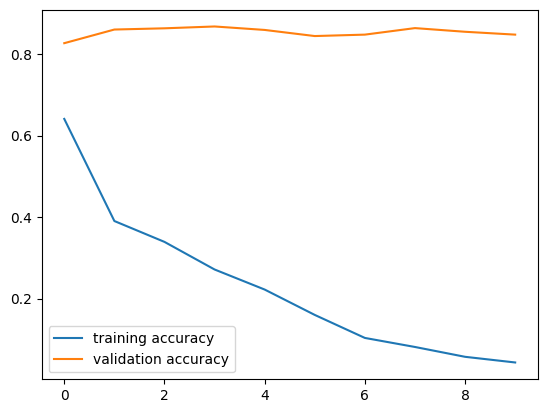

In [ ]:
# Plotting the loss and val_accuracy Graph

plt.plot(model.history.history["loss"], label="training accuracy")
plt.plot(model.history.history["val_accuracy"], label="validation accuracy")
plt.legend()
plt.show()

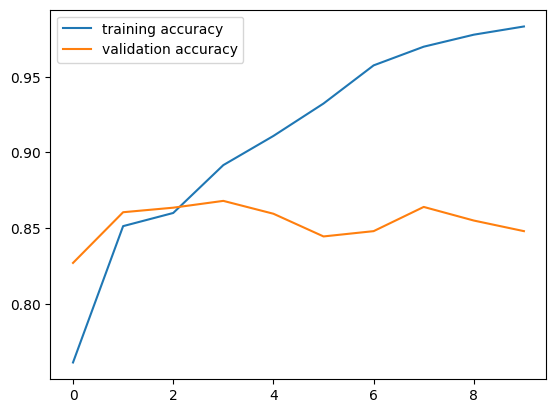

In [ ]:
# Plotting the Accuracy and val_accuracy Graph

plt.plot(model.history.history["accuracy"], label="training accuracy")
plt.plot(model.history.history["val_accuracy"], label="validation accuracy")
plt.legend()
plt.show()

In [ ]:
# evaluting the test_dataset

eval_data = model.evaluate(test_dataset)
print(f'Evaluation Loss {eval_data[0]}')
print(f'Evaluation Accuracy {eval_data[1]}')

16/16 [==============================] - 9s 557ms/step - loss: 0.8020 - accuracy: 0.8480
Evaluation Loss 0.8020132780075073
Evaluation Accuracy 0.8479999899864197


In [ ]:
# Saving Tokenizer 

import pickle

with open('BERT_tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# Saving Bert Model 

model.save('BERT_model_classfication', save_format='tf')

In [ ]:
!zip -r /content/BERT_classfication.zip /content/BERT_model_classfication

  adding: content/BERT_model_classfication/ (stored 0%)
  adding: content/BERT_model_classfication/saved_model.pb (deflated 92%)
  adding: content/BERT_model_classfication/variables/ (stored 0%)
  adding: content/BERT_model_classfication/variables/variables.data-00000-of-00001 (deflated 17%)
  adding: content/BERT_model_classfication/variables/variables.index (deflated 79%)
  adding: content/BERT_model_classfication/keras_metadata.pb (deflated 96%)
  adding: content/BERT_model_classfication/assets/ (stored 0%)
  adding: content/BERT_model_classfication/fingerprint.pb (stored 0%)


In [ ]:
# from google.colab import files
# files.download("/content/ziMIXHG8.zip")

In [ ]:
# Retriving the Tokenizer from Directory  

with open('/content/BERT_tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [ ]:
# Retriving the saved model

# from transformers import TFAutoModel
# model = tensorflow.keras.models.load_model('/content/BERT_model_classfication', custom_objects=TFAutoModel)

In [ ]:
# Making a Function that user Input as a Sentence and give them Output

def predict_text(text):
    speech_dict = {0:'hate_speech',1:'offensive_language', 2:'neither'}
    data = tokenizer([text], pad_to_max_length = True, max_length = 70)['input_ids']
    data = model.predict(data)
    ans = np.argmax(data)
    return speech_dict[ans]

In [ ]:
# Example of out Model Prediction

predict_text("u are such a fool")

1/1 [==============================] - 0s 116ms/step


'offensive_language'